<a href="https://colab.research.google.com/github/AC8151/COG_INTERNSHIP_GN22CDBDS001/blob/main/Computer_Vision_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex - Computer Vision using MS-Azure**
> **BY - Aditi Chatterjee**

In [1]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

In [2]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

# *Resource for Computer Vision*
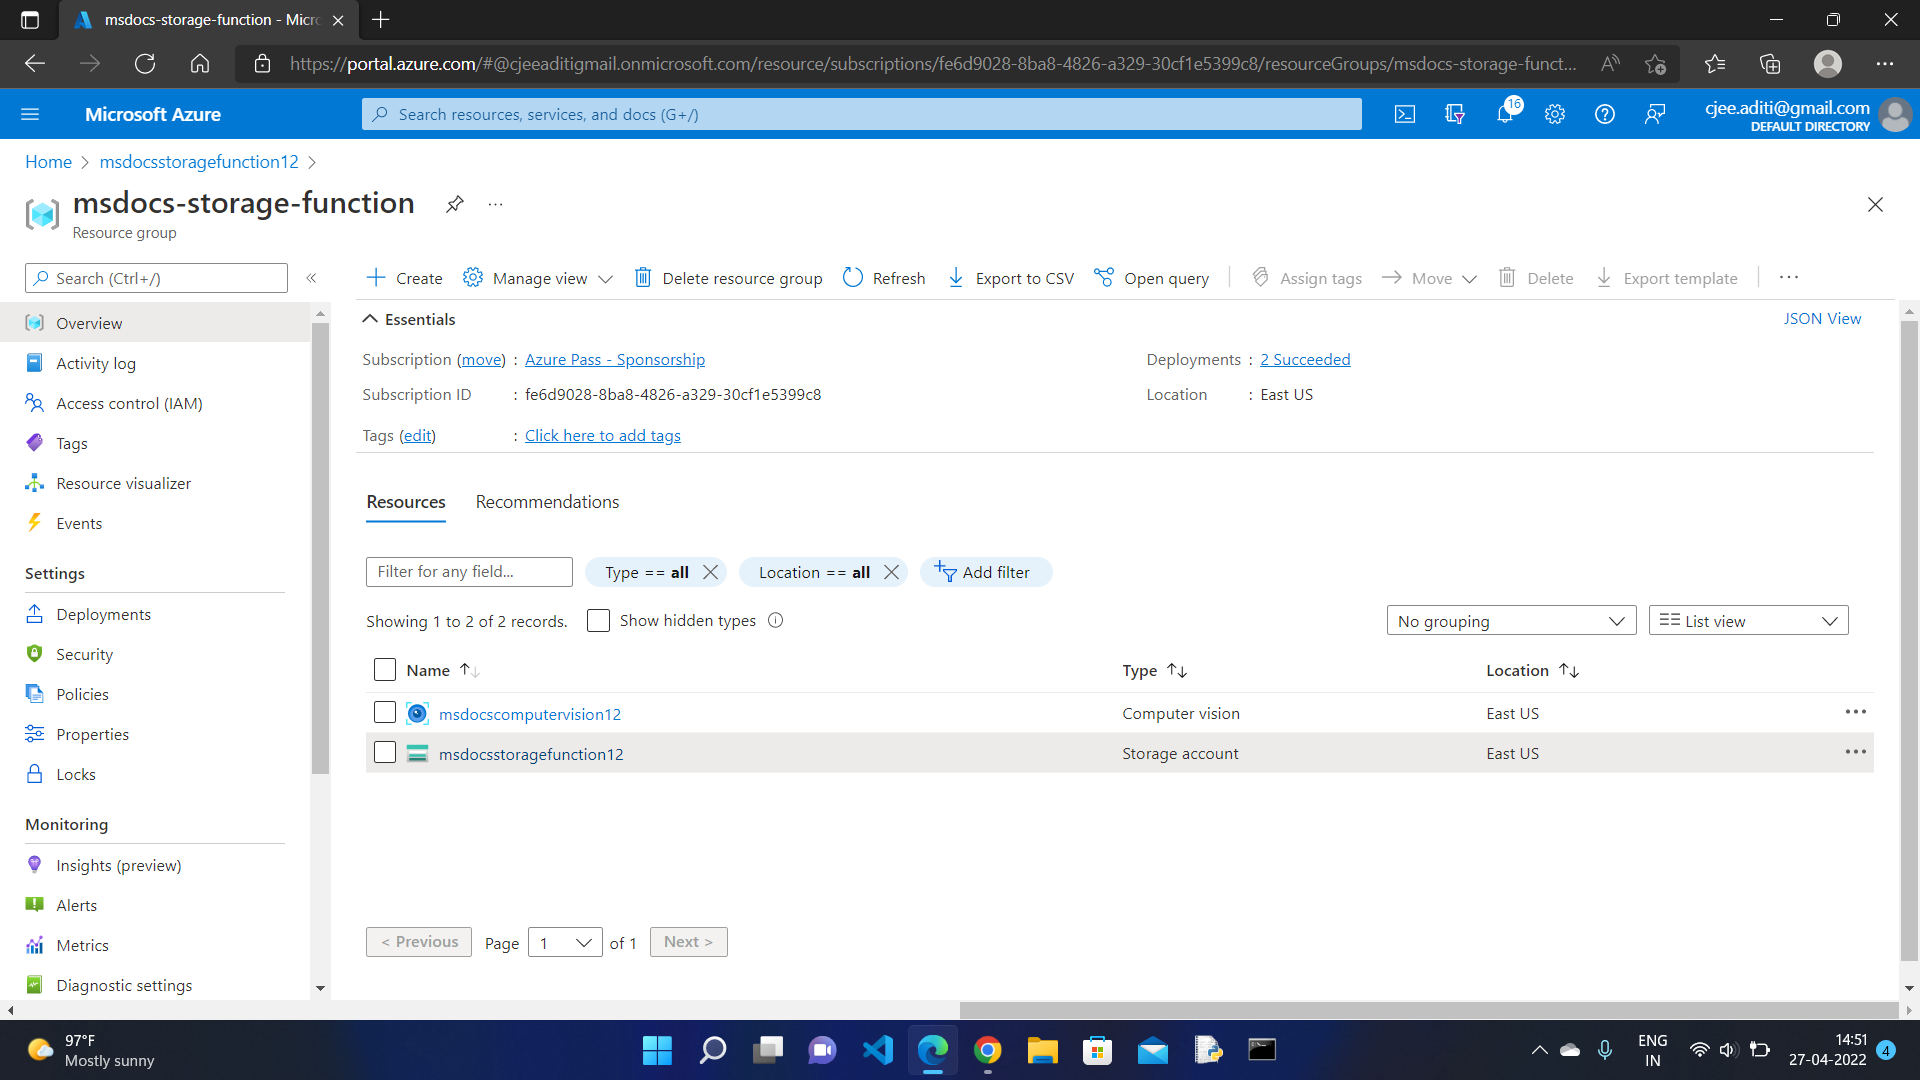



In [3]:
subscription_key = 'e27961d407e347d59d69976abca067b2'
endpoint = 'https://msdocscomputervision12.cognitiveservices.azure.com/'

In [4]:
client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

# *Container with Sample Images*
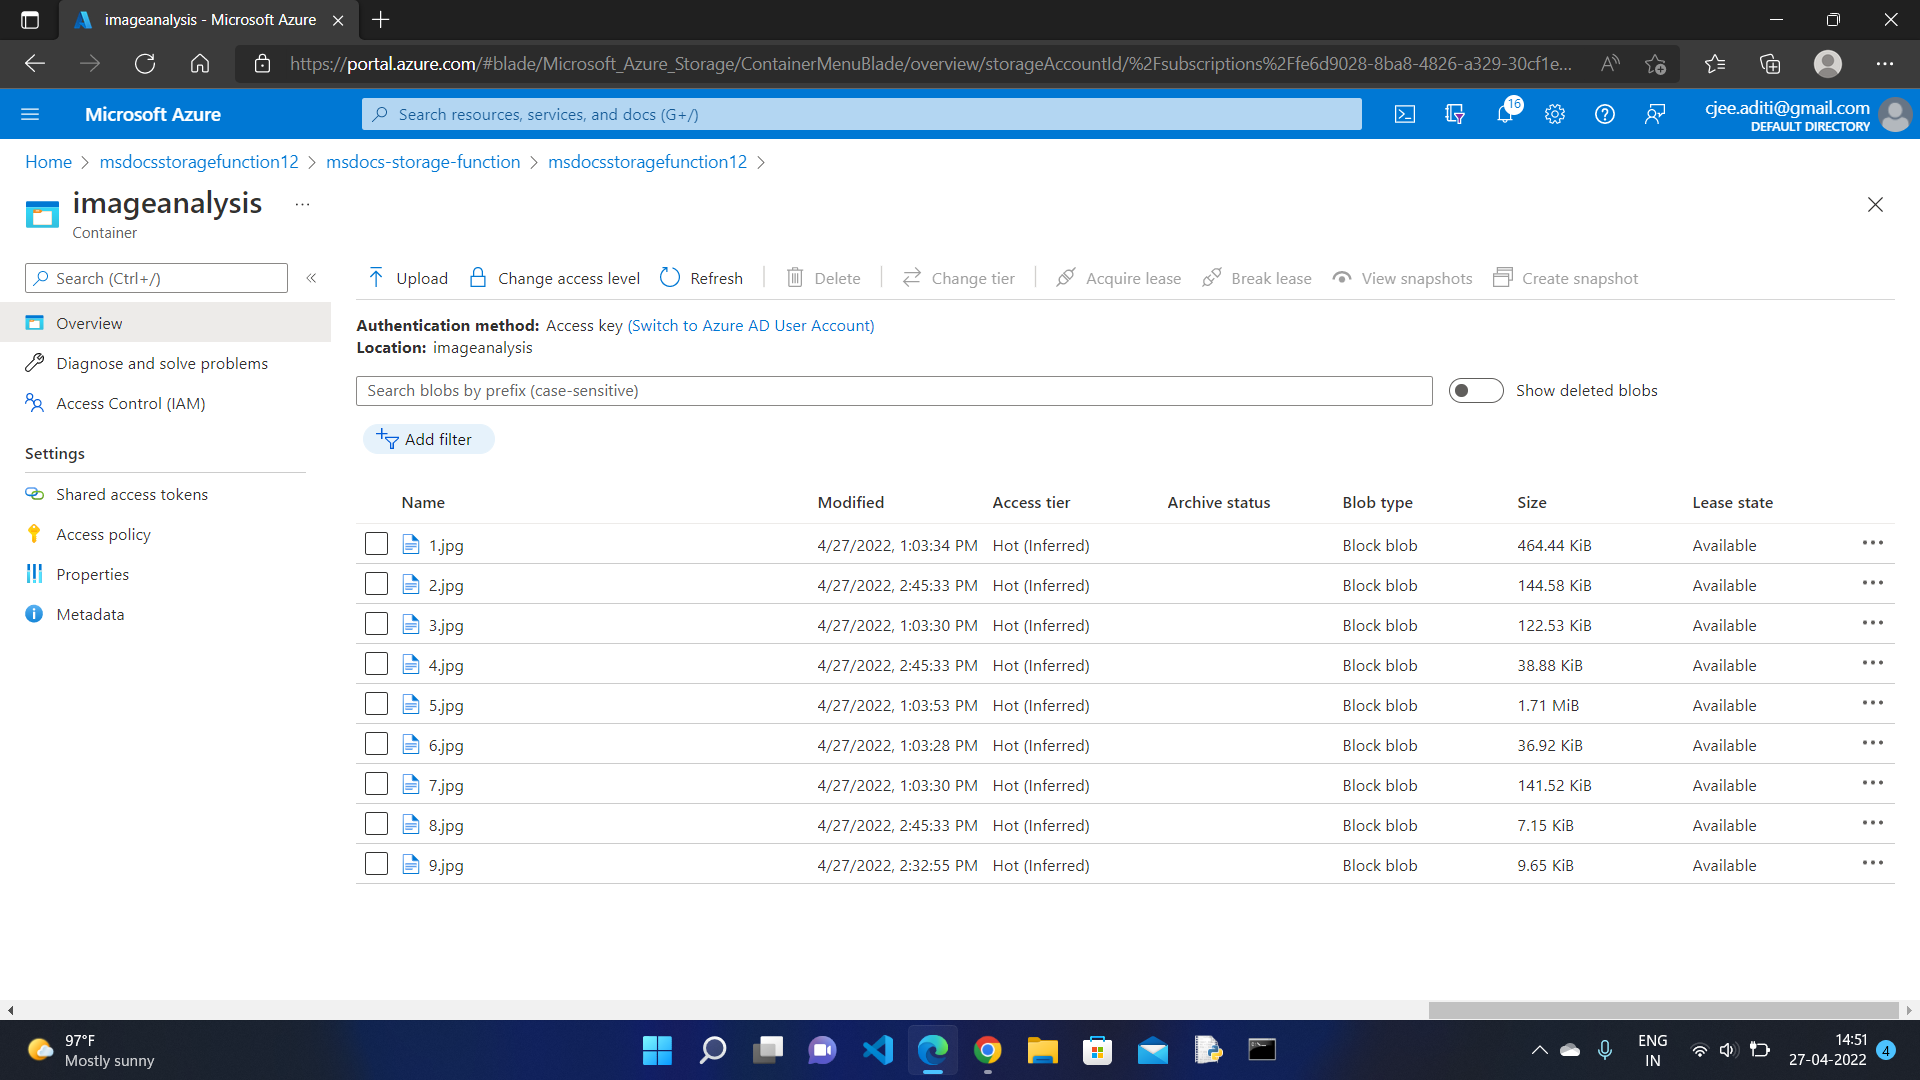

In [5]:
url = "https://msdocsstoragefunction12.blob.core.windows.net/imageanalysis"
images = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg']
names = ['sleepy hollow','stonehenge','utopia poster','adas','badas','tech logos','battlestarGalactica','tina fey','microsoft logo']

In [6]:
results = []
for image in images:
    result = client.describe_image("{}/{}".format(url, image))
    results.append(result)

**IMAGE DESCRIPTIONS**

In [7]:
print('Image Descriptions:')
i = 0
for result in results:
    if(len(result.captions)==0):
        print('No descriptions present')
    else:
        for caption in result.captions:
            print('Image title: ' + names[i])
            print('Description:',str(caption.text))
            print('How confident is the machine?:',str(caption.confidence*100)[:5]+'%')
            i = i+1
            print()

Image Descriptions:
Image title: sleepy hollow
Description: a man and woman posing for a picture
How confident is the machine?: 54.15%

Image title: stonehenge
Description: a grassy field with large rocks in the background with Stonehenge in the background
How confident is the machine?: 37.44%

Image title: utopia poster
Description: Neil Maskell standing in front of a poster
How confident is the machine?: 54.37%

Image title: adas
Description: diagram
How confident is the machine?: 99.87%

Image title: badas
Description: a galaxy in space
How confident is the machine?: 54.88%

Image title: tech logos
Description: logo, company name
How confident is the machine?: 99.50%

Image title: battlestarGalactica
Description: Richard Hatch, Lorne Greene et al. are posing for a picture
How confident is the machine?: 49.63%

Image title: tina fey
Description: Tina Fey smiling for the camera
How confident is the machine?: 49.73%

Image title: microsoft logo
Description: logo, company name
How confi

**ANALYSE IMAGE CATEGORY**

In [8]:
# Categories (Image analysis)
# exception handling to ignore any error-> this is production
# in production-> you log the error into a error.txt file 
# demo only-> ignore the error 

analysis = []
for image in images:
    analyze = client.analyze_image("{}/{}".format(url, image), visual_features=['categories'])
    analysis.append(analyze)

print('Image captions:')

for i,result in enumerate(analysis):
    try:
        if(len(result.categories)==0):
            print('No descriptions present')
        else:
            for category in result.categories:
                print('Image title: ' + names[i])
                print(str(category.name))
                print(str(category.score))
                i = i+1
                print()
    except Exception as exp:
        print(str(exp)) # in production, LOG error instead
        pass
        
       

Image captions:
No descriptions present
Image title: stonehenge
abstract_
0.00390625

Image title: utopia poster
outdoor_
0.00390625

Image title: utopia poster
others_
0.00390625

Image title: adas
text_sign
0.359375

Image title: adas
others_
0.59765625

Image title: badas
dark_
0.890625

Image title: tech logos
others_
0.04296875

Image title: battlestarGalactica
outdoor_
0.00390625

Image title: tina fey
text_sign
0.60546875

Image title: battlestarGalactica
people_crowd
0.2890625

Image title: tina fey
people_
0.31640625

Image title: microsoft logo
people_portrait
0.6796875

Image title: microsoft logo
others_
0.01171875

list index out of range


**LOCATING IMAGE IN CARTESIAN PLANE**

In [9]:
print('Object Detection')
results = []
for image in images:
    result = client.detect_objects("{}/{}".format(url, image))
    results.append(result)
for i,result in enumerate(results):
    try:
        if(len(result.objects)==0):
            print('No descriptions present')
        else:
            for object in result.objects:
                print('Image title: ' + names[i])
                # 
                x= object.rectangle.x
                y= object.rectangle.y
                w=object.rectangle.w
                h=object.rectangle.h
                print('Object at location')
                # 2 coordinates just for sample, we will use all 4 in usecase
                print(str(x),',', str(y))
                print(str(x),',', str(x+w))
                print(str(y), ',',str(y+h))
                print(str(x+w),',', str(y+h))
                print()
    except:
        pass

Object Detection
Image title: sleepy hollow
Object at location
69 , 38
69 , 1372
38 , 1626
1372 , 1626

No descriptions present
Image title: utopia poster
Object at location
31 , 62
31 , 160
62 , 366
160 , 366

Image title: utopia poster
Object at location
227 , 129
227 , 401
129 , 451
401 , 451

Image title: utopia poster
Object at location
290 , 172
290 , 493
172 , 469
493 , 469

Image title: utopia poster
Object at location
113 , 264
113 , 282
264 , 643
282 , 643

Image title: utopia poster
Object at location
629 , 1194
629 , 969
1194 , 1500
969 , 1500

Image title: utopia poster
Object at location
532 , 139
532 , 989
139 , 1272
989 , 1272

No descriptions present
No descriptions present
No descriptions present
Image title: battlestarGalactica
Object at location
462 , 315
462 , 678
315 , 644
678 , 644

Image title: battlestarGalactica
Object at location
50 , 80
50 , 943
80 , 1129
943 , 1129

Image title: tina fey
Object at location
15 , 121
15 , 151
121 , 213
151 , 213

No descripti

**CHECKING FOR BRANDS/LOGOS AMONGST IMAGES**

In [10]:
# Known entities-> BRANDS

analysis = []
for image in images:
    analyze = client.analyze_image("{}/{}".format(url, image), ['brands'])
    analysis.append(analyze)

print('image brands:')

for i,result in enumerate(analysis):
    print('Image title: ' + names[i])
    try:
        print('No of brands detected:' + str(len(result.brands)))
        for brand in result.brands:
            print('Brand Name:' + brand.name)
            print('Brand confidence:' + str(brand.confidence*100)[:5]+'%')
            if(len(result.brands)==0):
                print('No descriptions present')
            else:
               
                x= brand.rectangle.x
                y= brand.rectangle.y
                w=brand.rectangle.w
                h=brand.rectangle.h
                print('Logo position: ' + names[i])
                print(str(x),',', str(y))
                print(str(x),',', str(x+w))
                print(str(y), ',',str(y+h))
                print(str(x+w),',', str(y+h))
                print()
    except Exception as exp:
        print('Image title: ' + names[i])
        print(str(exp)) # in production, LOG error instead
        pass

image brands:
Image title: sleepy hollow
No of brands detected:0
Image title: stonehenge
No of brands detected:0
Image title: utopia poster
No of brands detected:0
Image title: adas
No of brands detected:0
Image title: badas
No of brands detected:0
Image title: tech logos
No of brands detected:0
Image title: battlestarGalactica
No of brands detected:0
Image title: tina fey
No of brands detected:0
Image title: microsoft logo
No of brands detected:1
Brand Name:Microsoft
Brand confidence:95.3%
Logo position: microsoft logo
169 , 80
169 , 387
80 , 275
387 , 275



**DETECTING FACES AMONGST IMAGES**

In [11]:
#FACIAL EXTRACTION
# Known entities-> FACES

analysis = []
for image in images:
    analyze = client.analyze_image("{}/{}".format(url, image), ['faces'])
    analysis.append(analyze)

print('image faces:')

for i,result in enumerate(analysis):
    print('Image title: ' + names[i])
    try:
        print('No of faces detected:' + str(len(result.faces)))
        for face in result.faces:
            
            if(len(result.faces)==0):
                print('No descriptions present')
            else:
                print('Face Detected:' + face.gender)
                print('Guesstimate age:' + str(face.age))
                x= face.face_rectangle.left
                y= face.face_rectangle.top
                w=face.face_rectangle.width
                h=face.face_rectangle.height
                print('Logo position: ' + names[i])
                print(str(x),',', str(y))
                print(str(x),',', str(x+w))
                print(str(y), ',',str(y+h))
                print(str(x+w),',', str(y+h))
                print()
    except Exception as exp:
        print('Image title: ' + names[i])
        print(str(exp)) # in production, LOG error instead
        pass
        

image faces:
Image title: sleepy hollow
No of faces detected:2
Face Detected:Male
Guesstimate age:30
Logo position: sleepy hollow
103 , 213
103 , 740
213 , 850
740 , 850

Face Detected:Female
Guesstimate age:7
Logo position: sleepy hollow
440 , 417
440 , 923
417 , 900
923 , 900

Image title: stonehenge
No of faces detected:0
Image title: utopia poster
No of faces detected:1
Face Detected:Male
Guesstimate age:33
Logo position: utopia poster
657 , 325
657 , 846
325 , 514
846 , 514

Image title: adas
No of faces detected:0
Image title: badas
No of faces detected:0
Image title: tech logos
No of faces detected:0
Image title: battlestarGalactica
No of faces detected:5
Face Detected:Male
Guesstimate age:33
Logo position: battlestarGalactica
581 , 699
581 , 746
699 , 864
746 , 864

Face Detected:Male
Guesstimate age:39
Logo position: battlestarGalactica
442 , 674
442 , 578
674 , 810
578 , 810

Face Detected:Female
Guesstimate age:22
Logo position: battlestarGalactica
776 , 787
776 , 905
787 , 

**CHECKING FOR HATE/PROFANE/ADULT CONTENT IN IMAGES FOR CENSORING**

In [12]:
# CENSORING for terrorism, nudity, hate content, profantiy, violence etc

analysis = []
for image in images:
    analyze = client.analyze_image("{}/{}".format(url, image), ['adult'])
    analysis.append(analyze)

print('Hate/Profanity/Other adult content:')

for i,result in enumerate(analysis):
    print('Image title: ' + names[i])
    try:
        #print('No of faces detected:' + str(len(result.faces)))
        print('is adult content')
        print(result.adult.is_adult_content)
        print('is adult content confidence')
        print(result.adult.adult_score)
        print('is racy content')
        print(result.adult.is_racy_content)
        print('is racy content confidence')
        print(result.adult.racy_score)
        print()
    except Exception as exp:
        print('Image title: ' + names[i])
        print(str(exp)) # in production, LOG error instead
        print()
        pass

Hate/Profanity/Other adult content:
Image title: sleepy hollow
is adult content
False
is adult content confidence
0.002925801556557417
is racy content
False
is racy content confidence
0.004703709855675697

Image title: stonehenge
is adult content
False
is adult content confidence
0.0013439550530165434
is racy content
False
is racy content confidence
0.00223240302875638

Image title: utopia poster
is adult content
False
is adult content confidence
0.0013862727209925652
is racy content
False
is racy content confidence
0.0024116479326039553

Image title: adas
is adult content
False
is adult content confidence
0.002266594907268882
is racy content
False
is racy content confidence
0.004219722934067249

Image title: badas
is adult content
False
is adult content confidence
0.012104234658181667
is racy content
False
is racy content confidence
0.01956365630030632

Image title: tech logos
is adult content
False
is adult content confidence
0.025339625775814056
is racy content
False
is racy content